![image](https://github.com/Mugangasia/Capstone-Project---Predicting-Best-Location-for-Wind-Energy-in-Kenya/assets/98708792/852724e5-c4c3-4ccc-ab83-1e937e9ca7d6)

# Wind Power Plant Location Selection System

# Business Understanding

The proposed project aims to develop a system that assists in selecting optimal locations for wind power plants based on weather conditions. The efficiency and profitability of wind energy depend on the wind patterns in specific areas. By leveraging historical weather data and geographical information, this system will provide valuable insights to energy companies and policymakers, enabling them to make informed decisions regarding the placement of wind power plants. The goal is to maximize energy generation and contribute to sustainable development by strategically locating wind power infrastructure.

The motivation behind this project is the urgent need to transition to renewable energy sources and mitigate the adverse effects of climate change caused by fossil fuel consumption. By facilitating the selection of suitable locations for wind power plants, this system can help accelerate the adoption of clean and sustainable energy solutions.



## Problem Statement
Selecting the most suitable locations for wind power plants is crucial for maximizing energy generation and ensuring sustainable and profitable operation. The efficiency of wind energy production depends heavily on the prevailing weather conditions in specific areas. However, the lack of a comprehensive and data-driven approach to assess the wind energy potential at different locations hinders effective decision-making for energy companies and policymakers.

This project aims to address this challenge by developing a system that leverages historical weather data and geographical information to identify and rank potential wind power plant locations in the following regions in Kenya(Kajiado,Marsabit,Laikipia,Nyeri,Meru and Samburu).Kajiado,Marsabit and Samburu already have the existing power plants but the potential to produce more green power from these regions and more still exists. The biggest challenge faced by stakeholders in this industry is accurately identifying profitable wind energy generating sites.

By creating a system that utilizes weather data and geolocation information, stakeholders can make informed choices regarding the optimal placement of wind power plants. This will result in improved energy generation efficiency, reduced reliance on fossil fuels, and a positive impact on global energy sustainability.

## Project Objectives
* To use predictive models(LSTM and Facebook Prophet),perform time series analysis to rank six locations based on hourly windspeed predictions.

* Develop an end product that provide insights on suitability of setting up turbine plant in an area.

## Success Metrics
* Prediction Accuracy : Metrics such as Mean Squared Error (MSE), Root Mean Squared Error (RMSE) will be used to measure the success of the predictive models.

* Minimum Viable Product (MVP): The MVP will include a baseline model that predicts wind speed in an specific location over a time difference if 1 Hour and give insights to stakeholders.


## Data Understanding
Our first dataset was collected from Kaggle from a wind power plant in Denmark. This dataset was used for our based model as it originated from actual wind turbine.
The columns are as following;
* LV ActivePower (kW): Real-time power output of a wind turbine in kilowatts.

* Wind Speed (m/s): Speed of the wind at the turbine location in meters per second.

* Theoretical_Power_Curve (KWh): Maximum potential power output of the wind turbine at different wind speeds in kilowatt-hours.

* Wind Direction (°): Direction from which the wind is blowing at the turbine location in degrees.

* Power Loss: Losses in the wind turbine system that can affect its overall efficiency and power generation.

Our second dataset was sourced from POWER data access viewer(DAV) by NASA. It contained the date and windspeed from 2013-2023. This dataset was then used for ranking best location for power production in Kenya.

### FIRST DATASET

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Initialize the DataUnderstanding class
class DataUnderstanding:
    def __init__(self, df):
        self.df = df
# Get the summary statistics
    def get_summary_statistics(self):
        summary_stats = self.df.describe()
        return summary_stats
#Get the count of missing values
    def get_missing_values(self):
        missing_values = self.df.isnull().sum()
        return missing_values
#Get the summary of the DataFrame
    def get_info(self):
        info = self.df.info()
        return info
# Get the data types
    def get_dtypes(self):
        dtypes = self.df.dtypes
        return dtypes
# Check the count of unique values for each column (excluding the time data)
    def get_unique_values(self):
        unique_values = self.df.iloc[:, 0:6].nunique()
        return unique_values

# Convert the 'Date' column to a datetime data type
    def convert_to_datetime(self, column):
        self.df[column] = pd.to_datetime(self.df[column])

# Set the specified column as the index
    def set_index(self, column):
        self.df.set_index(column, inplace=True)

# Sort the data based on the index (date) if necessary
    def sort_data(self):
        self.df.sort_index(inplace=True)

In [4]:
data = pd.read_csv('data.csv')

In [5]:
data.head()

Date/Time  LV ActivePower (kW)  Wind Speed (m/s)  \
0  01 01 2018 0:00           380.047791          5.311336   
1  01 01 2018 0:10           453.769196          5.672167   
2  01 01 2018 0:20           306.376587          5.216037   
3  01 01 2018 0:30           419.645904          5.659674   
4  01 01 2018 0:40           380.650696          5.577941   

   Theoretical_Power_Curve (KWh)  Wind Direction (°)  
0                     416.328908          259.994904  
1                     519.917511          268.641113  
2                     390.900016          272.564789  
3                     516.127569          271.258087  
4                     491.702972          265.674286

In [6]:
# Rename Date/Time column to DateTime
data.rename(columns={'Date/Time': 'DateTime'}, inplace=True)


In [7]:
data['DateTime'] = pd.to_datetime(data['DateTime'],format='%d %m %Y %H:%M')

In [8]:
du = DataUnderstanding(data)

In [9]:
# Get info about the dataset
du.get_info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50530 entries, 0 to 50529
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   DateTime                       50530 non-null  datetime64[ns]
 1   LV ActivePower (kW)            50530 non-null  float64       
 2   Wind Speed (m/s)               50530 non-null  float64       
 3   Theoretical_Power_Curve (KWh)  50530 non-null  float64       
 4   Wind Direction (°)             50530 non-null  float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 1.9 MB


In [10]:
# Rename Date/Time column to DateTime
data.rename(columns={'Date/Time': 'DateTime'}, inplace=True)


In [11]:
# checking for missing values
du.get_missing_values()

DateTime                         0
LV ActivePower (kW)              0
Wind Speed (m/s)                 0
Theoretical_Power_Curve (KWh)    0
Wind Direction (°)               0
dtype: int64

In [12]:
# Check the count of unique values for each column (excluding the time data)
unique_values = du.get_unique_values()
print("Unique Values:")
print(unique_values)

Unique Values:
DateTime                         50530
LV ActivePower (kW)              38764
Wind Speed (m/s)                 50305
Theoretical_Power_Curve (KWh)    37157
Wind Direction (°)               50251
dtype: int64


In [13]:
# make DateTime the index
du.set_index('DateTime')

In [14]:
# Get the summary statistics
summary_stats = du.get_summary_statistics()
print("Summary Statistics:")
summary_stats

Summary Statistics:


LV ActivePower (kW)  Wind Speed (m/s)  Theoretical_Power_Curve (KWh)  \
count         50530.000000      50530.000000                   50530.000000   
mean           1307.684332          7.557952                    1492.175463   
std            1312.459242          4.227166                    1368.018238   
min              -2.471405          0.000000                       0.000000   
25%              50.677890          4.201395                     161.328167   
50%             825.838074          7.104594                    1063.776282   
75%            2482.507568         10.300020                    2964.972462   
max            3618.732910         25.206011                    3600.000000   

       Wind Direction (°)  
count        50530.000000  
mean           123.687559  
std             93.443736  
min              0.000000  
25%             49.315437  
50%             73.712978  
75%            201.696720  
max            359.997589

In [15]:
# power loss
data['Power Loss'] = data['Theoretical_Power_Curve (KWh)'] - data['LV ActivePower (kW)']
data.head()


LV ActivePower (kW)  Wind Speed (m/s)  \
DateTime                                                     
2018-01-01 00:00:00           380.047791          5.311336   
2018-01-01 00:10:00           453.769196          5.672167   
2018-01-01 00:20:00           306.376587          5.216037   
2018-01-01 00:30:00           419.645904          5.659674   
2018-01-01 00:40:00           380.650696          5.577941   

                     Theoretical_Power_Curve (KWh)  Wind Direction (°)  \
DateTime                                                                 
2018-01-01 00:00:00                     416.328908          259.994904   
2018-01-01 00:10:00                     519.917511          268.641113   
2018-01-01 00:20:00                     390.900016          272.564789   
2018-01-01 00:30:00                     516.127569          271.258087   
2018-01-01 00:40:00                     491.702972          265.674286   

                     Power Loss  
DateTime                         
2018-01-01 00:00:00   36.281117  
2018-01-01 00:10:00   66.148315  
2018-01-01 00:20:00   84.523429  
2018-01-01 00:30:00   96.481665  
2018-01-01 00:40:00  111.052276

# Exploratory Data Analysis

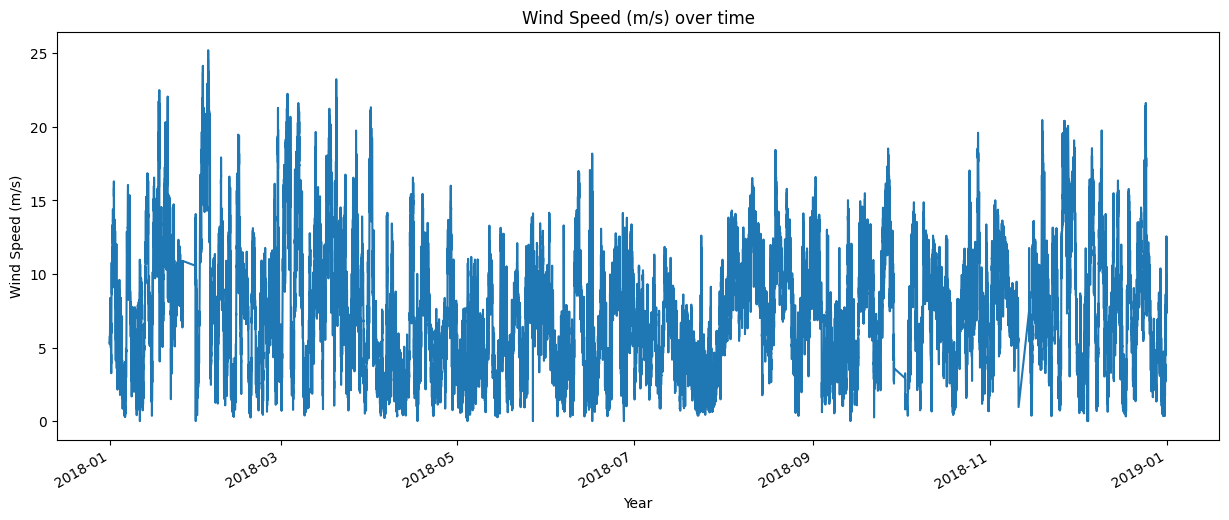

In [16]:
data['Wind Speed (m/s)'].plot(figsize=(15, 6))
plt.title('Wind Speed (m/s) over time')
plt.ylabel('Wind Speed (m/s)')
plt.xlabel('Year')
plt.show()

* Due to Random Noise in the Data, we will resample the data to 1 hour, daily, weekly and Monthly frequencies.

In [17]:
hourly = data.resample('H').mean()
daily = data.resample('D').mean()
weekly = data.resample('W').mean()
monthly = data.resample('M').mean()

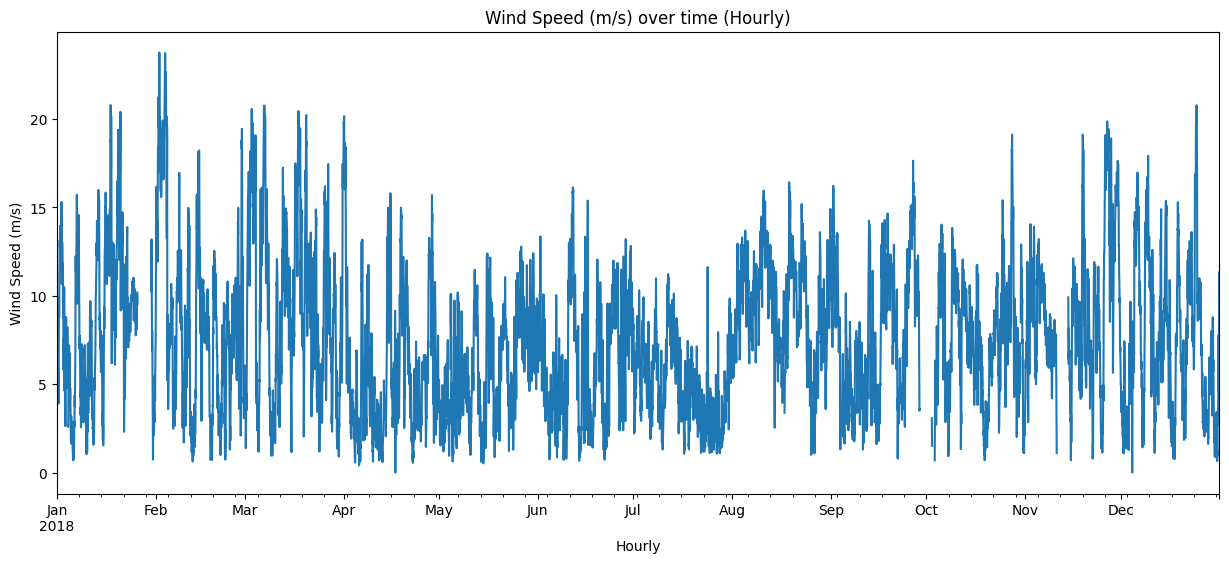

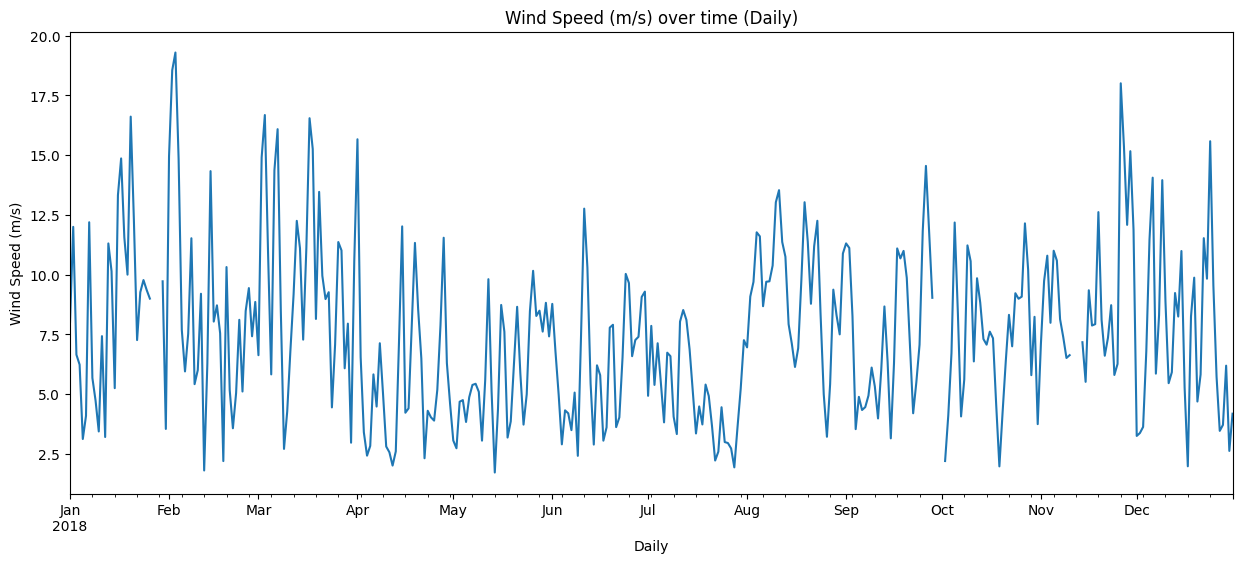

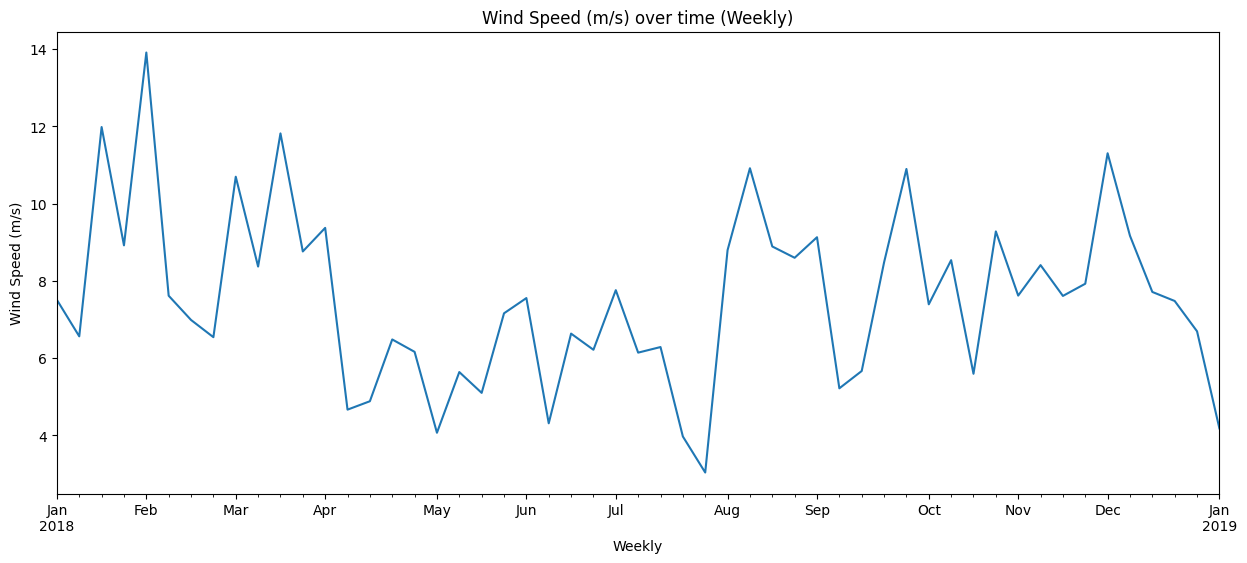

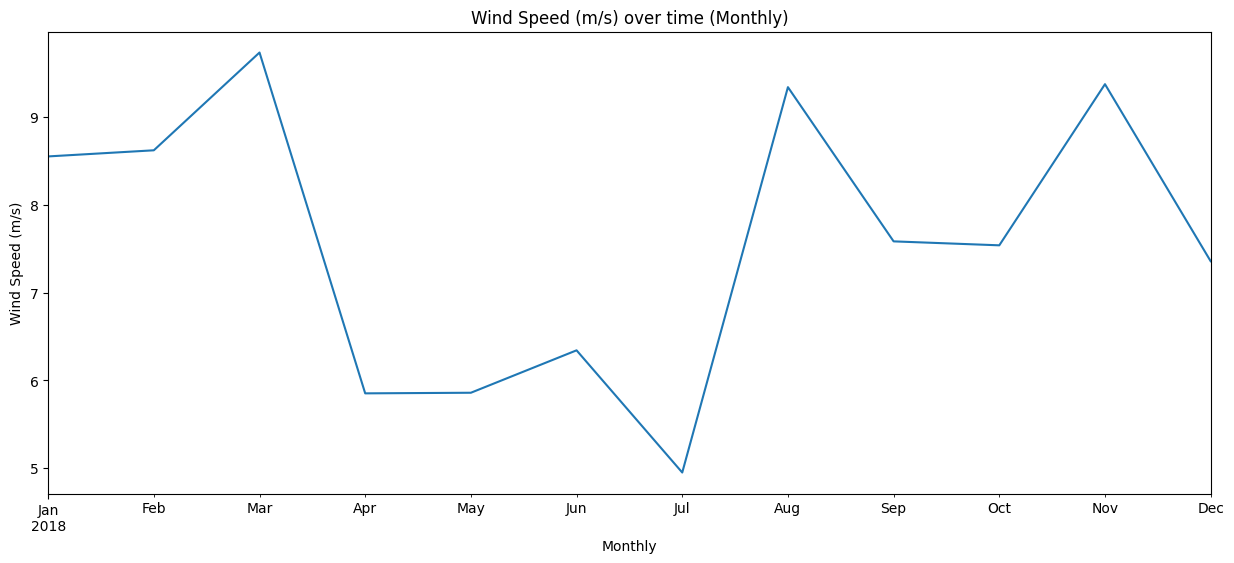

In [18]:

# Resample the DataFrame using the index
time_intervals = ['Hourly', 'Daily', 'Weekly', 'Monthly']
data_resampled = [data.resample('H').mean(), data.resample('D').mean(), data.resample('W').mean(), data.resample('M').mean()]

# Plot 'Wind Speed (m/s)' over time for each time interval using a for loop
for i in range(len(time_intervals)):
    plt.figure(figsize=(15, 6))
    data_resampled[i]['Wind Speed (m/s)'].plot()
    plt.title(f'Wind Speed (m/s) over time ({time_intervals[i]})')
    plt.ylabel('Wind Speed (m/s)')
    plt.xlabel(time_intervals[i])
    plt.show()

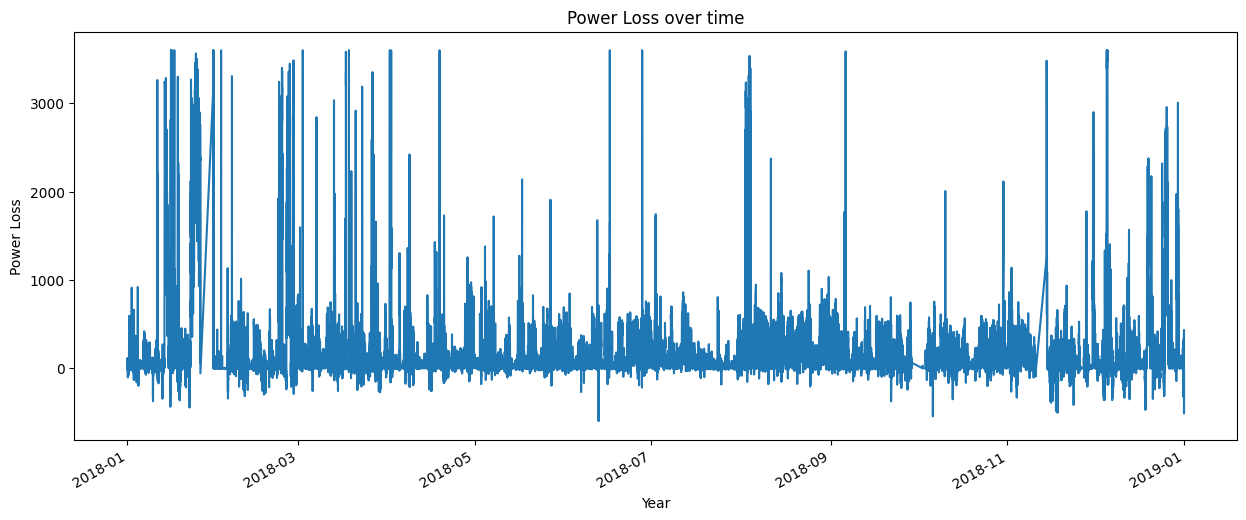

In [19]:
# PLot power loss over time
data['Power Loss'].plot(figsize=(15, 6))
plt.title('Power Loss over time')
plt.ylabel('Power Loss')
plt.xlabel('Year')
plt.show()

In [20]:
data.head()

LV ActivePower (kW)  Wind Speed (m/s)  \
DateTime                                                     
2018-01-01 00:00:00           380.047791          5.311336   
2018-01-01 00:10:00           453.769196          5.672167   
2018-01-01 00:20:00           306.376587          5.216037   
2018-01-01 00:30:00           419.645904          5.659674   
2018-01-01 00:40:00           380.650696          5.577941   

                     Theoretical_Power_Curve (KWh)  Wind Direction (°)  \
DateTime                                                                 
2018-01-01 00:00:00                     416.328908          259.994904   
2018-01-01 00:10:00                     519.917511          268.641113   
2018-01-01 00:20:00                     390.900016          272.564789   
2018-01-01 00:30:00                     516.127569          271.258087   
2018-01-01 00:40:00                     491.702972          265.674286   

                     Power Loss  
DateTime                         
2018-01-01 00:00:00   36.281117  
2018-01-01 00:10:00   66.148315  
2018-01-01 00:20:00   84.523429  
2018-01-01 00:30:00   96.481665  
2018-01-01 00:40:00  111.052276

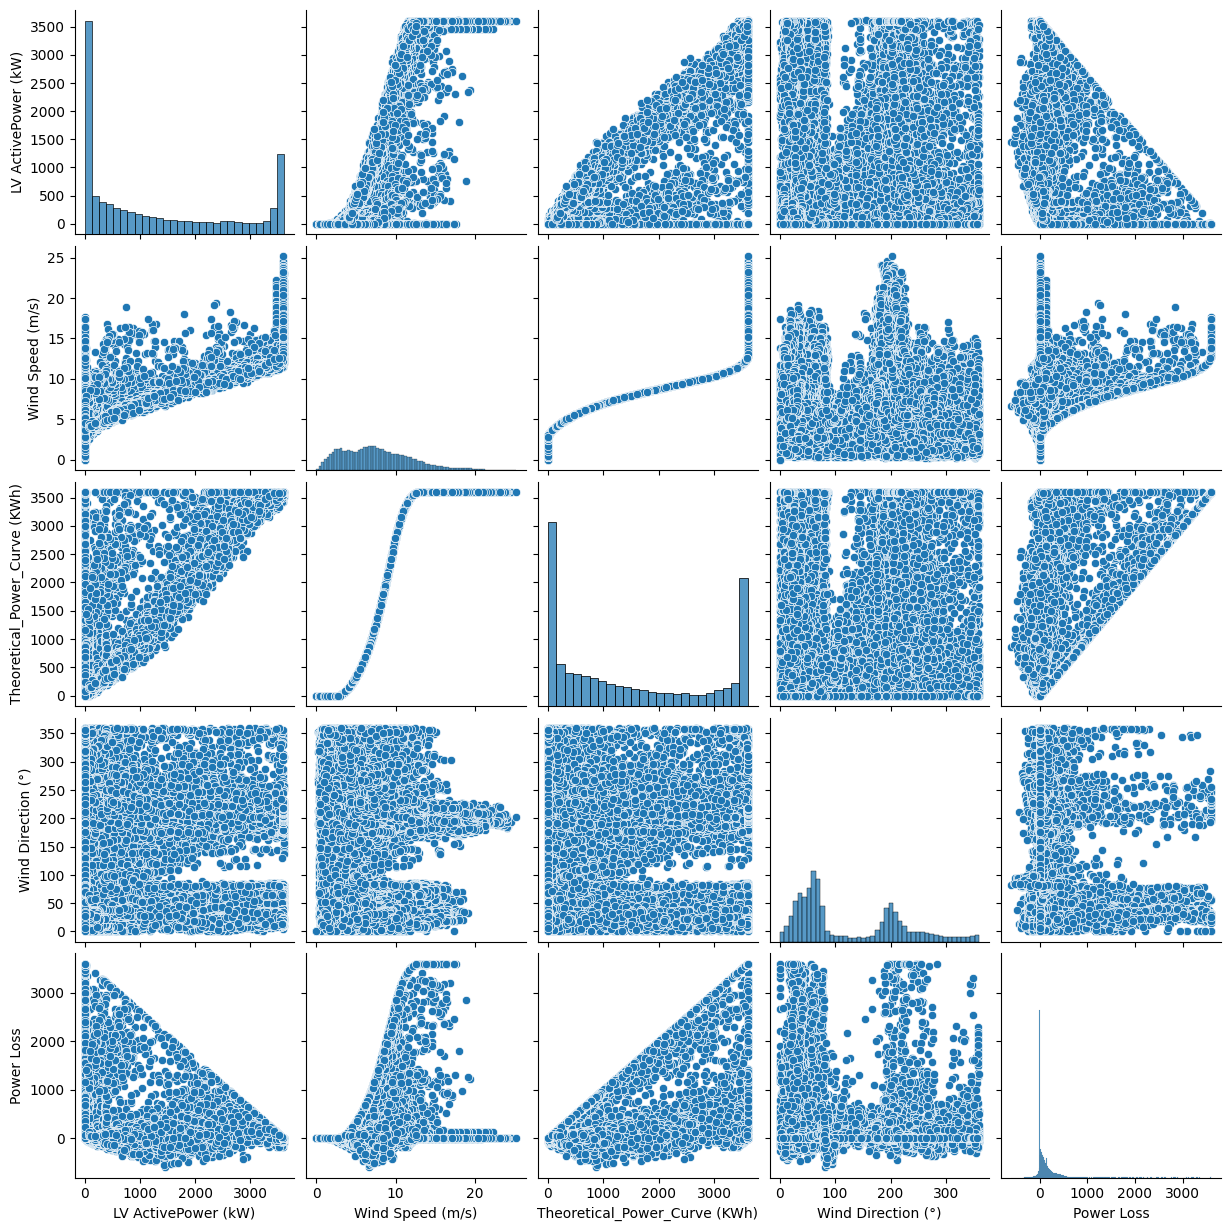

In [21]:
sns.pairplot(data)

plt.show()

## Bi-Variate Analysis

In [22]:
# Function for Bivariate Analysis

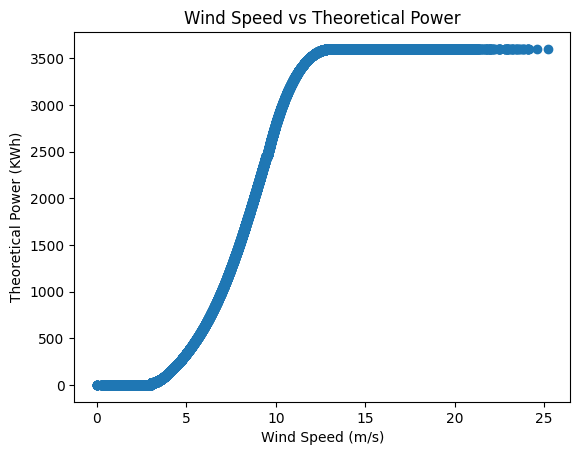

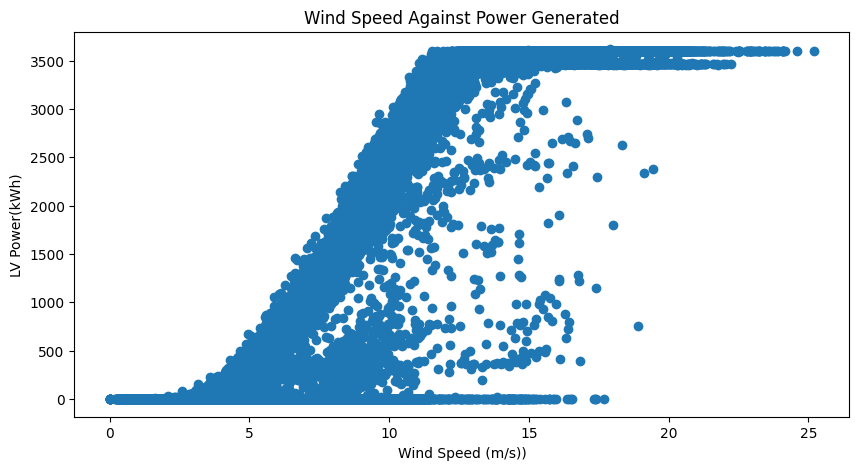

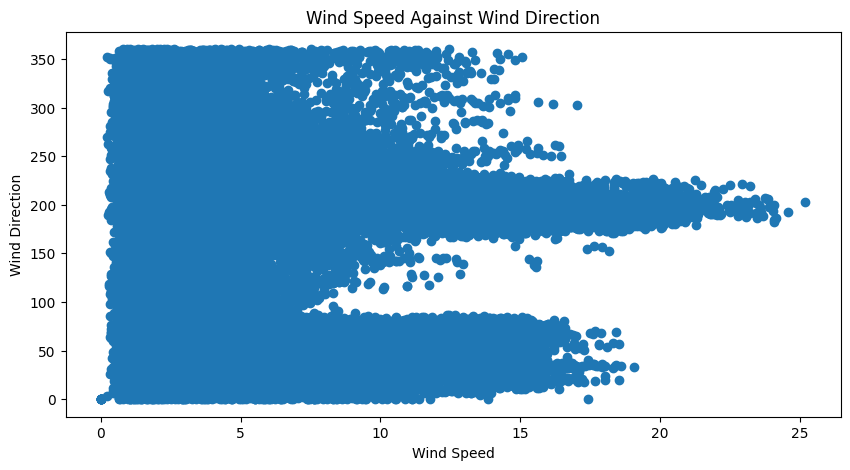

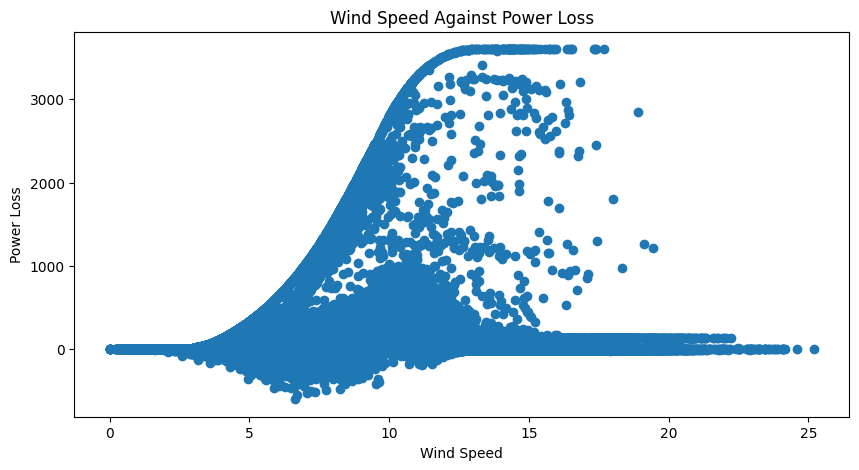

In [23]:
# Plot wind speed vs theoretical power
plt.scatter(data['Wind Speed (m/s)'], data['Theoretical_Power_Curve (KWh)'])
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Theoretical Power (KWh)')
plt.title('Wind Speed vs Theoretical Power')
plt.show()

# Plot wind speed vs LV power
plt.figure(figsize=(10,5))
plt.scatter(data['Wind Speed (m/s)'],data['LV ActivePower (kW)'])
plt.xlabel('Wind Speed (m/s))')
plt.ylabel('LV Power(kWh)')
plt.title('Wind Speed Against Power Generated')
plt.show()

# Plot wind speed vs wind direction
plt.figure(figsize=(10,5))
plt.scatter(data['Wind Speed (m/s)'],data['Wind Direction (°)'])
plt.xlabel('Wind Speed')
plt.ylabel('Wind Direction')
plt.title('Wind Speed Against Wind Direction')
plt.show()

# Plot wind speed vs power loss
plt.figure(figsize=(10,5))
plt.scatter(data['Wind Speed (m/s)'],data['Power Loss'])
plt.xlabel('Wind Speed')
plt.ylabel('Power Loss')
plt.title('Wind Speed Against Power Loss')
plt.show()


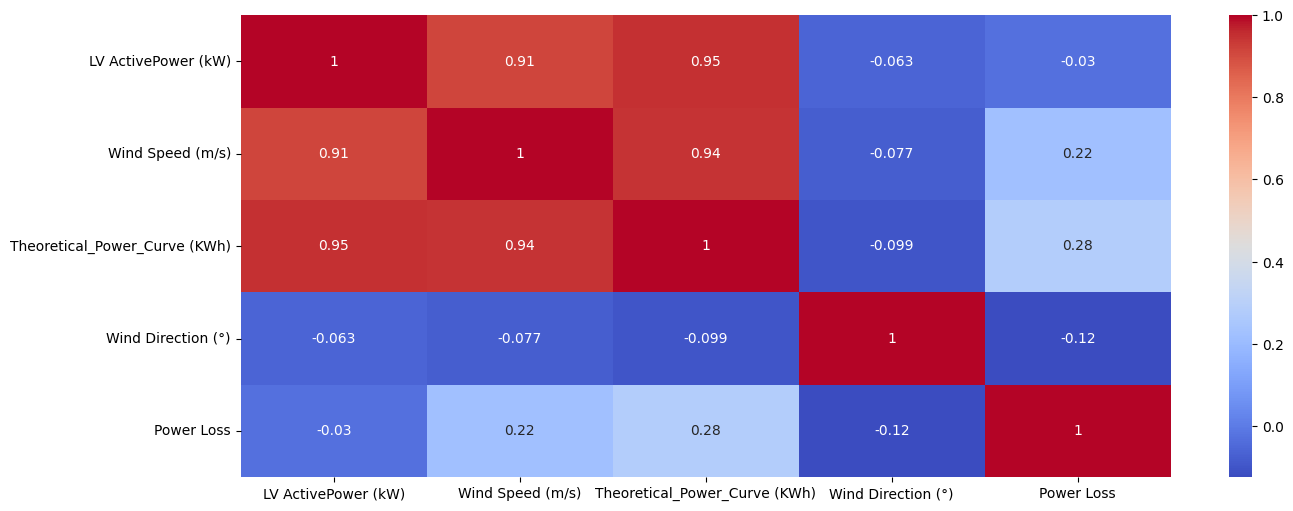

In [24]:
# Plot the correlation heatmap
plt.figure(figsize=(15, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()

In [25]:
# Drop the columns and keep 'LV ActivePower (kW)' and 'Wind Speed (m/s)'
data_subset = data.drop(['Theoretical_Power_Curve (KWh)', 'Wind Direction (°)','Power Loss'], axis=1)

In [26]:
data_subset.head()

LV ActivePower (kW)  Wind Speed (m/s)
DateTime                                                  
2018-01-01 00:00:00           380.047791          5.311336
2018-01-01 00:10:00           453.769196          5.672167
2018-01-01 00:20:00           306.376587          5.216037
2018-01-01 00:30:00           419.645904          5.659674
2018-01-01 00:40:00           380.650696          5.577941

### SECOND DATASET

In [53]:
df_2 = pd.read_csv('combined_file.csv')

<ipython-input-53-a7bb8dab7925>:1: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2 = pd.read_csv('combined_file.csv')


In [54]:
df_2.head()

YEAR  MO  DY  HR  WS50M Location  Latitude   Longitude   Unnamed: 8  \
0  2013   1   1   2   5.25  Kajiado    -1.8313     36.7987         NaN   
1  2013   1   1   3   4.96  Kajiado    -1.8313     36.7987         NaN   
2  2013   1   1   4   4.77  Kajiado    -1.8313     36.7987         NaN   
3  2013   1   1   5   4.64  Kajiado    -1.8313     36.7987         NaN   
4  2013   1   1   6   4.55  Kajiado    -1.8313     36.7987         NaN   

  Unnamed: 9  
0        NaN  
1        NaN  
2        NaN  
3        NaN  
4        NaN

In [55]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526032 entries, 0 to 526031
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   YEAR        526032 non-null  int64  
 1   MO          526032 non-null  int64  
 2   DY          526032 non-null  int64  
 3   HR          526032 non-null  int64  
 4   WS50M       526032 non-null  float64
 5   Location    526032 non-null  object 
 6   Latitude    526032 non-null  float64
 7   Longitude   526032 non-null  float64
 8   Unnamed: 8  0 non-null       float64
 9   Unnamed: 9  1 non-null       object 
dtypes: float64(4), int64(4), object(2)
memory usage: 40.1+ MB


In [56]:
#chsnging the Time/ Date
df_2['Date'] = df_2['YEAR'].astype(str) + '/' + df_2['MO'].astype(str) +'/' +  df_2['DY'].astype(str)

In [57]:
df_2.describe()

YEAR             MO             DY             HR  \
count  526032.000000  526032.000000  526032.000000  526032.000000   
mean     2017.502046       6.522037      15.723815      11.500000   
std         2.872997       3.449275       8.801458       6.922193   
min      2013.000000       1.000000       1.000000       0.000000   
25%      2015.000000       4.000000       8.000000       5.750000   
50%      2018.000000       7.000000      16.000000      11.500000   
75%      2020.000000      10.000000      23.000000      17.250000   
max      2023.000000      12.000000      31.000000      23.000000   

               WS50M      Latitude      Longitude   Unnamed: 8  
count  526032.000000  526032.000000  526032.000000         0.0  
mean        5.622826       0.244350      37.221750         NaN  
std         2.184073       1.279817       0.514761         NaN  
min         0.020000      -1.831300      36.695200         NaN  
25%         4.080000      -0.391400      36.798700         NaN  
50%         5.530000       0.132750      36.987550         NaN  
75%         7.080000       1.094700      37.877800         NaN  
max        14.760000       2.328600      37.983700         NaN

In [58]:
df_2.columns

Index(['YEAR', 'MO', 'DY', 'HR', 'WS50M', 'Location', 'Latitude ',
       'Longitude ', 'Unnamed: 8', 'Unnamed: 9', 'Date'],
      dtype='object')

In [59]:
# Drop the unnecessary columns
df_2.drop(['MO', 'DY', 'HR', 'Unnamed: 8', 'Unnamed: 9'], axis=1, inplace=True)

In [60]:
df_2.head()

YEAR  WS50M Location  Latitude   Longitude       Date
0  2013   5.25  Kajiado    -1.8313     36.7987  2013/1/1
1  2013   4.96  Kajiado    -1.8313     36.7987  2013/1/1
2  2013   4.77  Kajiado    -1.8313     36.7987  2013/1/1
3  2013   4.64  Kajiado    -1.8313     36.7987  2013/1/1
4  2013   4.55  Kajiado    -1.8313     36.7987  2013/1/1

In [61]:
# Rename the 'WS50M' column to 'Wind Speed'
df_2.rename(columns={'WS50M': 'Wind Speed'}, inplace=True)


In [62]:
# Create a pivot table with 'Date' as the index and 'Location' as columns
df_transposed = df_2.pivot_table(index='Date', columns='Location', values='Wind Speed')

# Merge the transposed data with the original dataset
df_merged = df_2.merge(df_transposed, on='Date')

# Display the merged DataFrame
df_merged.head()

YEAR  Wind Speed Location  Latitude   Longitude       Date  Kajiado  \
0  2013        5.25  Kajiado    -1.8313     36.7987  2013/1/1    4.625   
1  2013        4.96  Kajiado    -1.8313     36.7987  2013/1/1    4.625   
2  2013        4.77  Kajiado    -1.8313     36.7987  2013/1/1    4.625   
3  2013        4.64  Kajiado    -1.8313     36.7987  2013/1/1    4.625   
4  2013        4.55  Kajiado    -1.8313     36.7987  2013/1/1    4.625   

   Laikipia   Maralal  Marsabit      Meru      Nyeri  
0  4.844545  4.453182   6.014286  3.474286  3.521364  
1  4.844545  4.453182   6.014286  3.474286  3.521364  
2  4.844545  4.453182   6.014286  3.474286  3.521364  
3  4.844545  4.453182   6.014286  3.474286  3.521364  
4  4.844545  4.453182   6.014286  3.474286  3.521364

In [63]:
# Drop the unnecessary columns
df_2.drop(['Location'], axis=1, inplace=True)

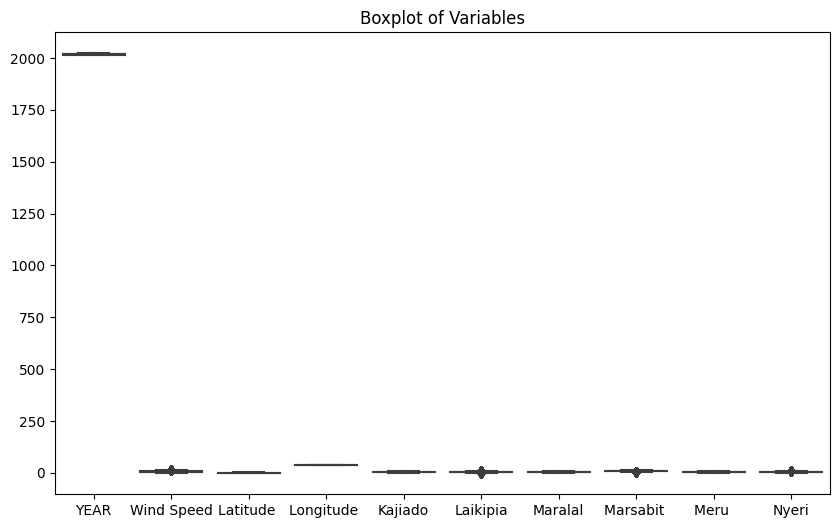

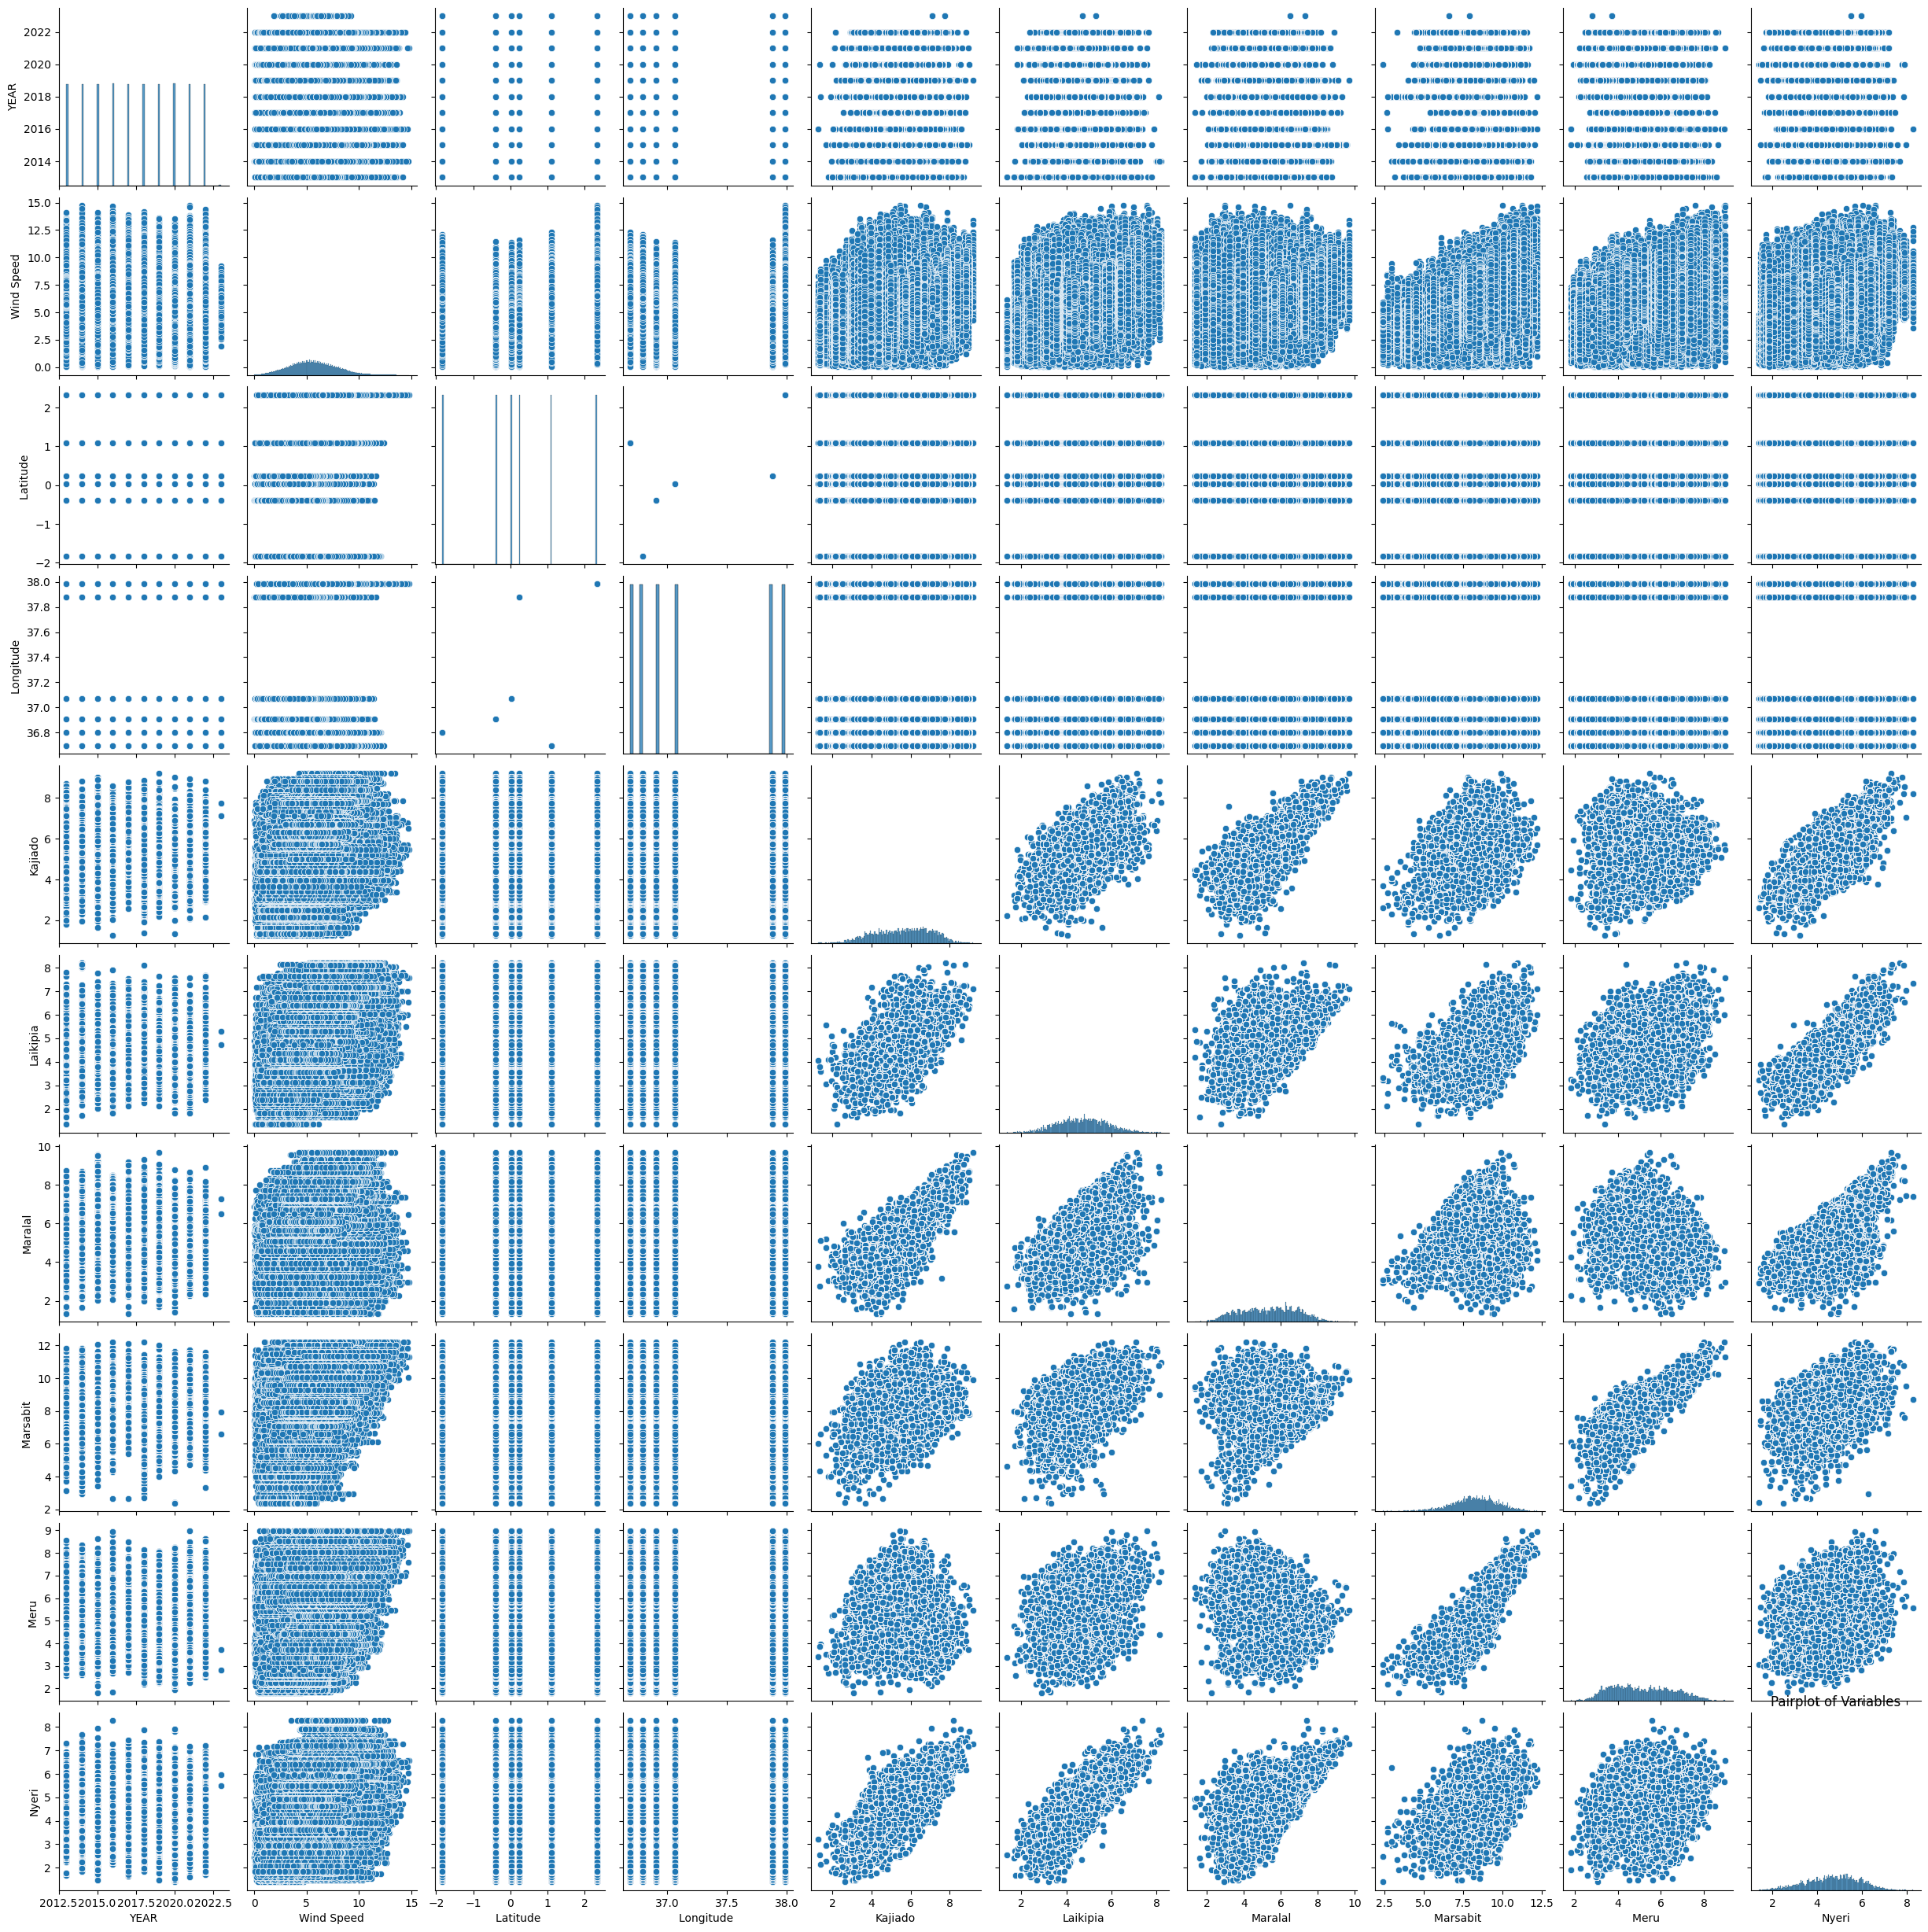

In [64]:

# Check for outliers using box plots
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_merged)
plt.title("Boxplot of Variables")
plt.show()

# Create scatter plots to visualize relationships
sns.pairplot(df_merged)
plt.title("Pairplot of Variables")
plt.show()


In [68]:

# Select specific columns for outlier removal
numeric_cols = ['Wind Speed']

# Calculate z-scores for selected columns
z_scores = np.abs((df_merged[numeric_cols] - df_merged[numeric_cols].mean()) / df_merged[numeric_cols].std())

# Define a threshold for outliers (e.g., z-score greater than 3)
threshold = 3

# Remove rows with z-scores greater than the threshold
df_filtered = df_merged[(z_scores < threshold).all(axis=1)]

# Display the filtered DataFrame without outliers
df_filtered.head()


YEAR  Wind Speed Location  Latitude   Longitude       Date  Kajiado  \
0  2013        5.25  Kajiado    -1.8313     36.7987  2013/1/1    4.625   
1  2013        4.96  Kajiado    -1.8313     36.7987  2013/1/1    4.625   
2  2013        4.77  Kajiado    -1.8313     36.7987  2013/1/1    4.625   
3  2013        4.64  Kajiado    -1.8313     36.7987  2013/1/1    4.625   
4  2013        4.55  Kajiado    -1.8313     36.7987  2013/1/1    4.625   

   Laikipia   Maralal  Marsabit      Meru      Nyeri  
0  4.844545  4.453182   6.014286  3.474286  3.521364  
1  4.844545  4.453182   6.014286  3.474286  3.521364  
2  4.844545  4.453182   6.014286  3.474286  3.521364  
3  4.844545  4.453182   6.014286  3.474286  3.521364  
4  4.844545  4.453182   6.014286  3.474286  3.521364

In [69]:
# Drop the 'Location' column
df_filtered.drop('Location', axis=1, inplace=True)

# Display the modified DataFrame
df_filtered.head()



<ipython-input-69-f4d2bd142fdc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.drop('Location', axis=1, inplace=True)


YEAR  Wind Speed  Latitude   Longitude       Date  Kajiado  Laikipia  \
0  2013        5.25    -1.8313     36.7987  2013/1/1    4.625  4.844545   
1  2013        4.96    -1.8313     36.7987  2013/1/1    4.625  4.844545   
2  2013        4.77    -1.8313     36.7987  2013/1/1    4.625  4.844545   
3  2013        4.64    -1.8313     36.7987  2013/1/1    4.625  4.844545   
4  2013        4.55    -1.8313     36.7987  2013/1/1    4.625  4.844545   

    Maralal  Marsabit      Meru      Nyeri  
0  4.453182   6.014286  3.474286  3.521364  
1  4.453182   6.014286  3.474286  3.521364  
2  4.453182   6.014286  3.474286  3.521364  
3  4.453182   6.014286  3.474286  3.521364  
4  4.453182   6.014286  3.474286  3.521364

In [67]:
# Remove leading and trailing whitespace from column name
df_filtered.rename(columns=lambda x: x.strip(), inplace=True)

<ipython-input-67-397b706c1057>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.rename(columns=lambda x: x.strip(), inplace=True)


In [70]:
df_filtered.head()

YEAR  Wind Speed  Latitude   Longitude       Date  Kajiado  Laikipia  \
0  2013        5.25    -1.8313     36.7987  2013/1/1    4.625  4.844545   
1  2013        4.96    -1.8313     36.7987  2013/1/1    4.625  4.844545   
2  2013        4.77    -1.8313     36.7987  2013/1/1    4.625  4.844545   
3  2013        4.64    -1.8313     36.7987  2013/1/1    4.625  4.844545   
4  2013        4.55    -1.8313     36.7987  2013/1/1    4.625  4.844545   

    Maralal  Marsabit      Meru      Nyeri  
0  4.453182   6.014286  3.474286  3.521364  
1  4.453182   6.014286  3.474286  3.521364  
2  4.453182   6.014286  3.474286  3.521364  
3  4.453182   6.014286  3.474286  3.521364  
4  4.453182   6.014286  3.474286  3.521364

In [ ]:
import folium
import pandas as pd

# Assuming you have already loaded the dataset and stored it in df_2

# Create a map centered on the mean latitude and longitude
map_center = [df_2['Latitude'].mean(), df_2['Longitude'].mean()]
m = folium.Map(location=map_center, zoom_start=10)

# Iterate over the rows of the DataFrame
for index, row in df_2.iterrows():
    latitude = row['Latitude']
    longitude = row['Longitude']
    location = row['Location']

    # Add a marker for each location
    folium.Marker([latitude, longitude], popup=location).add_to(m)

# Display the map
m


In [ ]:
def angle_range(st, ed, x):
    if st < ed: ed += 360
    return st <= x.values < ed

def wind_news(df):
    df = df[df['wind_direction'] > 0]
    df['wind_direction'][ df['wind_direction'] < 11.25 ] = df['wind_direction'][ df['wind_direction'] < 11.25 ].apply(lambda x : x+360)

    wind_df = pd.DataFrame(columns=['direction', 'speed', 'frequency'])
    angle = [ (i * 22.5 - 11.25 + 360) % 360.0 for i in range(16) ]
    direction = ['N', 'NNE', 'NE', 'ENE', 'E', 'ESE', 'SE', 'SSE', 'S', 'SSW', 'SW', 'WSW', 'W', 'WMW', 'NW', 'NNW']
    speed = [i*2.5 for i in range(1, 9)]
    tot = 0
    for ang, d  in zip(angle, direction):
        for s in speed:
            cnt = df[(ang <= df['wind_direction'] ) & ( df['wind_direction'] < ang+22.5 )&  (s-2.5 <= df['wind_speed']) & (df['wind_speed'] < s) ].shape[0]
            tot += cnt
            wind_df = wind_df.append({'direction': d, 'speed':s, 'frequency': cnt }, ignore_index=True)
    return wind_df

In [ ]:
def wind_direction_plot(df, title):
    wind = wind_news(df)
    fig = px.bar_polar(wind, r="frequency", theta="direction",
                       color="speed", template="plotly_dark",
                       color_discrete_sequence= px.colors.sequential.Plasma[-2::-1])
    fig.update_layout(title_text='Site ID {}'.format(title))
    fig.show()